Novemeber 21, 2024

In [ ]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/"
columns = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
X = pd.read_csv(url, usecols=columns)
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 1.2 Defining the model




In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

#### [Fitting and predicting](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict) the kmeans model on `X`.

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### Printting the center points of the clusters that the model created.

In [ ]:
# Cluster Centers (Centroids)
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

#### 1.5 Finding and printing the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the the data using the current model.

In [ ]:
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.5511916046195927

<!-- END QUESTION -->

### Visualization

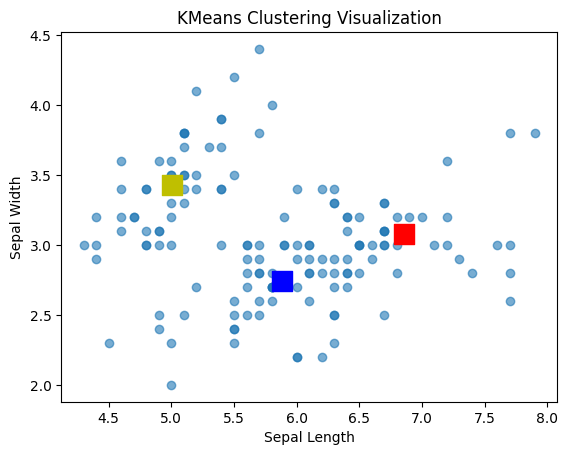

In [ ]:
plt.scatter(data=X, x='sepal.length', y='sepal.width', alpha=0.6)
colors = ['r', 'y', 'b']
for i, coor in enumerate(kmeans.cluster_centers_):
 plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.title("KMeans Clustering Visualization")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### Experimentation

We chose an arbitrary value of k for the above experiment. In the lecture videos, we saw that elbow method is one of the ways to make a better guess for the value of k, although not always useful.

In [ ]:
#Running this cell to mkae sure the variable names are updated.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

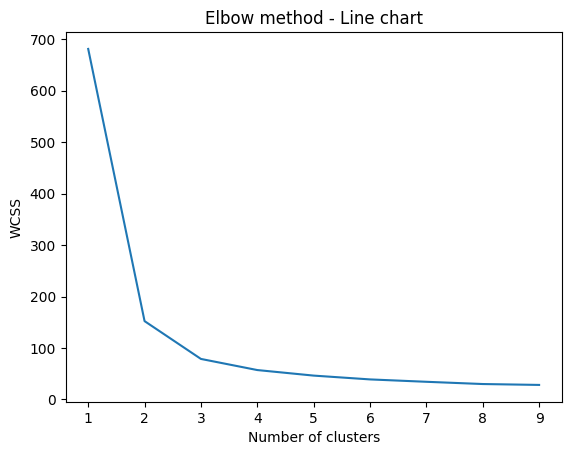

In [ ]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method - Line chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

I can infer from the elbow graph that the optimal number of clusters (k) is indicated by the point where the graph shows a noticeable elbow, meaning the rate of decrease in the Within Cluster Sum of Squares (WCSS) significantly slows down. In the elbow graph created, this point appears around k = 3, suggesting that three clusters might be a good choice. But considering the context of the dataset such as the Human Development Index (HDI) data, which categorizes countries into Very High, High, Medium, and Low development levels, a value of k = 4 would be appropriate to align with these predefined categories.

# Neural Networks


For this section, we will be working with the CIFAR-10 dataset.

The CIFAR-10 dataset consists of 32x32 color images, with the 10 classes below:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


The cells below will load and visualize the data for you.

In [ ]:
# Importing the required libraries
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

**Note**: The datset might take ~5 mins to load

In [ ]:
# Load the CIFAR dataset
cifar = fetch_openml('cifar_10_small', version=1)
X, y = cifar.data, cifar.target

print(X.shape)
print(y.shape)

(20000, 3072)
(20000,)


In [ ]:
# Convert input features and labels to NumPy arrays so that data "plays nice" with libraries
X = np.array(X)
y = np.array(y)

The cell below visualizes the images.

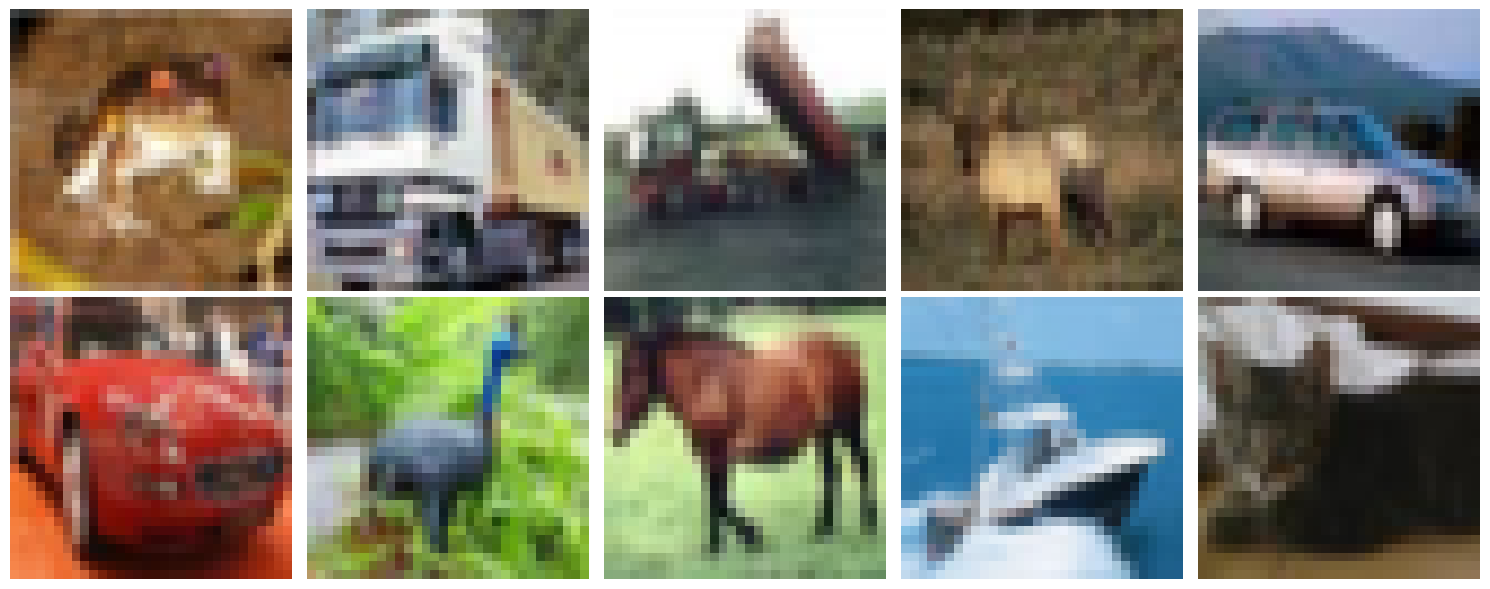

In [ ]:
def visualize_images(X, y, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

    # Plot each image
    for i, ax in enumerate(axes.ravel()):
        if i < len(X):

            # Creating the image
            img = np.stack([X[i].reshape(3,32, 32)[0], X[i].reshape(3,32, 32)[1], X[i].reshape(3,32, 32)[2]], axis=2)

            # Display the image
            ax.imshow(img)
            label = str(int(float(y[i])))

            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize first 10 images
visualize_images(X, y)

Splitting the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the data using a StandardScaler.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Initializing and training an MLPClassifier model.


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=50, verbose=True, random_state=42)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.87569668
Iteration 2, loss = 1.56847048
Iteration 3, loss = 1.41761726
Iteration 4, loss = 1.30927658
Iteration 5, loss = 1.19664705
Iteration 6, loss = 1.09724178
Iteration 7, loss = 0.99728441
Iteration 8, loss = 0.91530240
Iteration 9, loss = 0.82960995
Iteration 10, loss = 0.74162246
Iteration 11, loss = 0.67184803
Iteration 12, loss = 0.59959061
Iteration 13, loss = 0.52501786
Iteration 14, loss = 0.47936129
Iteration 15, loss = 0.44306813
Iteration 16, loss = 0.38082009
Iteration 17, loss = 0.33370623
Iteration 18, loss = 0.30083286
Iteration 19, loss = 0.26531014
Iteration 20, loss = 0.25513071
Iteration 21, loss = 0.26300686
Iteration 22, loss = 0.22483245
Iteration 23, loss = 0.22267180
Iteration 24, loss = 0.20260676
Iteration 25, loss = 0.20797348
Iteration 26, loss = 0.18076027
Iteration 27, loss = 0.14173741
Iteration 28, loss = 0.11990992
Iteration 29, loss = 0.11509387
Iteration 30, loss = 0.11124637
Iteration 31, loss = 0.12279823
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=50, random_state=42,
              verbose=True)

#### Evaluating and printing the the accuracy of the model.

In [ ]:
accuracy = mlp.score(X_test, y_test)
accuracy

0.45725


Tunning the hyperparameters of the Multi-layer Perceptron classifier to improve the accuracy

In [ ]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(392, 196), max_iter=100, verbose=True, random_state=42)
mlp_1.fit(X_train, y_train)

Iteration 1, loss = 1.91274441
Iteration 2, loss = 1.51440444
Iteration 3, loss = 1.37426851
Iteration 4, loss = 1.23289242
Iteration 5, loss = 1.10824123
Iteration 6, loss = 0.99117550
Iteration 7, loss = 0.87916383
Iteration 8, loss = 0.78242865
Iteration 9, loss = 0.67380274
Iteration 10, loss = 0.59703272
Iteration 11, loss = 0.52149217
Iteration 12, loss = 0.43960819
Iteration 13, loss = 0.37000336
Iteration 14, loss = 0.35917230
Iteration 15, loss = 0.32007216
Iteration 16, loss = 0.27319222
Iteration 17, loss = 0.24513121
Iteration 18, loss = 0.20744462
Iteration 19, loss = 0.18135605
Iteration 20, loss = 0.19748448
Iteration 21, loss = 0.18028153
Iteration 22, loss = 0.20396795
Iteration 23, loss = 0.20265022
Iteration 24, loss = 0.15858306
Iteration 25, loss = 0.11920945
Iteration 26, loss = 0.08949648
Iteration 27, loss = 0.10365155
Iteration 28, loss = 0.12587334
Iteration 29, loss = 0.11238777
Iteration 30, loss = 0.15424181
Iteration 31, loss = 0.20093028
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(392, 196), max_iter=100, random_state=42,
              verbose=True)

In [ ]:
train_accuracy = mlp_1.score(X_train, y_train)
test_accuracy = mlp_1.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.49425


To improve the MLP classifier's test accuracy, I increased the hidden layer sizes from (256, 128, 64) to (392, 196) to enable the model to capture more complex patterns. Additionally, I increased the maximum number of iterations from 50 to 100 to provide the model sufficient training time, though it stopped early once the loss stopped improving. In the part 2.4 configuration, the test accuracy was lower (around 45.7%) compared to the part 3 version (around 49.4%).

The model achieved 100% training accuracy, indicating it perfectly memorized the training data. However, the test accuracy of 49.43% suggests poor generalization, likely due to overfitting. This implies the model fails to effectively capture patterns that apply to unseen data, requiring further modifications to improve performance.